## OCDE Data: Analysis of main donors

### Import countries-only merged data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns

In [2]:
df = pd.read_csv('merged1.csv', encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,DONOR,Donor,RECIPIENT,Recipient,SERIES,Series,TIME,Year,Unit Code,...,num_donors_by_country,ODA_total_value_by_country_yr,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita
0,0,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2008,2008,USD,...,28,1.167140e+09,0.005055,16,False,False,2,2,LM,327.563722
1,1,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2009,2009,USD,...,28,1.456830e+09,0.004043,16,False,False,2,2,LM,298.619682
2,2,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2010,2010,USD,...,28,2.258180e+09,0.002608,19,False,False,2,2,LM,334.021573
3,3,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2011,2011,USD,...,28,4.336110e+09,0.000424,19,False,False,2,2,LM,387.082465
4,4,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2012,2012,USD,...,28,1.599800e+09,0.000144,22,False,False,2,2,LM,424.600386


In [4]:
len(df)

22680

### Import New population and GDP data

In [5]:
pop = pd.read_csv('population.csv', encoding='latin-1')
gdp = pd.read_csv('gdp.csv', encoding='latin-1')

In [6]:
years = range(2004, 2020)
years = [str(yr) for yr in years]

In [7]:
pop = pd.melt(pop, id_vars = ['Recipient'], value_vars = years)
pop.rename(columns = {'Recipient': 'Recipient', 'variable': 'Year', 'value': 'population'}, inplace = True)
pop.head()

,Recipient,Year,population
0,Aruba,2004,98737.0
1,Afghanistan,2004,24726684.0
2,Angola,2004,18758145.0
3,Albania,2004,3026939.0
4,Andorra,2004,76244.0


In [8]:
gdp = pd.melt(gdp, id_vars = ['Recipient'], value_vars = years)
gdp.rename(columns = {'Recipient': 'Recipient', 'variable': 'Year', 'value': 'gdp'}, inplace = True)
gdp.head()

,Recipient,Year,gdp
0,Aruba,2004,2.228492e+09
1,Afghanistan,2004,5.226779e+09
2,Angola,2004,2.355205e+10
3,Albania,2004,7.184681e+09
4,Andorra,2004,2.894922e+09


In [9]:
print(len(pop)) # checking the number of rows
print(len(gdp))

4224
4224


In [10]:
df_new = pd.merge(pop, gdp, how = 'inner', on = ['Recipient', 'Year'])
len(df_new)

4224

### A Note on the Various Recipient Naming Conventions
So far, many of the csv's available have different naming conventions. The ISO codes can help, but they are far from perfect. We can define a dictionary to apply to the Recipient columns in order to have something akin to standardization of naming practices. The following is such a dictionary and is purely tentative. 

They keys are arranged alphabetically by the leading key character. The keys are what are currently present in the column whereas the values are what we change those entries to, each key-value pair separated by a comma. More specifically, 'key1': 'value1', 'key2': 'value2'.

In [11]:
dic = {  
       'Brunei Darussalam': 'Brunei', 
       'Burma': 'Myanmar', 
       'China': "China (People's Republic of)",
       'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
       'Congo, Rep.': 'Congo', 
       'Curaçao': 'Curacao', 
       'Egypt, Arab Rep.': 'Egypt', 
       'Federated States of Micronesia': 'Micronesia',
       'Gambia, The': 'Gambia', 
       'Guinea Bissau': 'Guinea-Bissau', 
       'Hong Kong SAR, China': 'Hong Kong', 
       'Iran, Islamic Rep.': 'Iran', 
       "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
       'Korea, Rep.': 'Korea, South', 
       'Kyrgyz Rep.': 'Kyrgyzstan', 
       'Lao PDR': "Lao People's Democratic Republic", 
       'Macedonia': 'North Macedonia',
       'Micronesia, Fed. Sts.': 'Micronesia', 
       'North Korea': "Democratic People's Republic of Korea", 
       'Russian Federation': 'Russia', 
       'Sint Maarten (Dutch part)': 'Sint Maarten',
       'Slovak Republic': 'Slovakia', 
       'St. Kitts and Nevis': 'Saint Kitts and Nevis', 
       'St. Lucia': 'Saint Lucia', 
       'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines', 
       'Venezuela, RB': 'Venezuela', 
       'Vietnam': 'Viet Nam', 
       'West Bank and Gaza': 'West Bank and Gaza Strip', 
       'Yemen, Republic': 'Yemen'
       }

In [12]:
# here I apply the dictionary to replace the old names (that match the keys) to the new names (that match the values)
df_new.Recipient.replace(dic, inplace = True)

In [13]:
# checking which Recipient names differ between the two data sets
new_names = set(df_new.Recipient)
old_names = set(df.Recipient)
diff1 = [country for country in new_names if country not in old_names].sort()

In [14]:
print(diff1)

None


In [15]:
df_new.Year = [int(year) for year in df_new.Year]

In [16]:
len(df)

22680

In [17]:
df_merge = pd.merge(df, df_new, how = 'left', on = ['Recipient', 'Year'])

In [18]:
len(df_merge)

22680

In [19]:
df_merge.head()

,Unnamed: 0,DONOR,Donor,RECIPIENT,Recipient,SERIES,Series,TIME,Year,Unit Code,...,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita,population,gdp
0,0,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2008,2008,USD,...,0.005055,16,False,False,2,2,LM,327.563722,60411195.0,1.978852e+10
1,1,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2009,2009,USD,...,0.004043,16,False,False,2,2,LM,298.619682,62448574.0,1.864837e+10
2,2,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2010,2010,USD,...,0.002608,19,False,False,2,2,LM,334.021573,64563854.0,2.156572e+10
3,3,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2011,2011,USD,...,0.000424,19,False,False,2,2,LM,387.082465,66755153.0,2.583975e+10
4,4,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2012,2012,USD,...,0.000144,22,False,False,2,2,LM,424.600386,69020747.0,2.930624e+10


In [20]:
# here I get rid of the Unnamed: 0 column since it was just an former index
df_merge = df_merge.iloc[:, 1:]

In [21]:
df_merge.head()

,DONOR,Donor,RECIPIENT,Recipient,SERIES,Series,TIME,Year,Unit Code,Unit,...,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita,population,gdp
0,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2008,2008,USD,US Dollar,...,0.005055,16,False,False,2,2,LM,327.563722,60411195.0,1.978852e+10
1,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2009,2009,USD,US Dollar,...,0.004043,16,False,False,2,2,LM,298.619682,62448574.0,1.864837e+10
2,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2010,2010,USD,US Dollar,...,0.002608,19,False,False,2,2,LM,334.021573,64563854.0,2.156572e+10
3,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2011,2011,USD,US Dollar,...,0.000424,19,False,False,2,2,LM,387.082465,66755153.0,2.583975e+10
4,3,Denmark,235,Democratic Republic of the Congo,969,ODA Commitments,2012,2012,USD,US Dollar,...,0.000144,22,False,False,2,2,LM,424.600386,69020747.0,2.930624e+10


In [22]:
# seeing how many null values are in the DataFrame
df_merge.isnull().sum()

DONOR                                0
Donor                                0
RECIPIENT                            0
Recipient                            0
SERIES                               0
Series                               0
TIME                                 0
Year                                 0
Unit Code                            0
Unit                                 0
PowerCode Code                       0
PowerCode                            0
Reference Period Code            22680
Reference Period                 22680
Value                                0
Flag Codes                       22680
Flags                            22680
num_donors_by_country_yr             0
num_donors_by_country                0
ODA_total_value_by_country_yr        0
proportion                           0
Rank                                 0
us_top_5                             0
us_top_3                             0
Code_abr                             0
Code_expanded            

In [23]:
# getting rid of the columns that I don't need
df_merge.drop(['DONOR', 'RECIPIENT', 'SERIES', 'Series', 'TIME', 'Unit Code', 
               'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 
               'Reference Period', 'Flag Codes', 'Flags'], axis = 1, inplace = True)

In [24]:
df_merge.head()

,Donor,Recipient,Year,Value,num_donors_by_country_yr,num_donors_by_country,ODA_total_value_by_country_yr,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita,population,gdp
0,Denmark,Democratic Republic of the Congo,2008,5900000.0,23,28,1.167140e+09,0.005055,16,False,False,2,2,LM,327.563722,60411195.0,1.978852e+10
1,Denmark,Democratic Republic of the Congo,2009,5890000.0,24,28,1.456830e+09,0.004043,16,False,False,2,2,LM,298.619682,62448574.0,1.864837e+10
2,Denmark,Democratic Republic of the Congo,2010,5890000.0,23,28,2.258180e+09,0.002608,19,False,False,2,2,LM,334.021573,64563854.0,2.156572e+10
3,Denmark,Democratic Republic of the Congo,2011,1840000.0,24,28,4.336110e+09,0.000424,19,False,False,2,2,LM,387.082465,66755153.0,2.583975e+10
4,Denmark,Democratic Republic of the Congo,2012,230000.0,23,28,1.599800e+09,0.000144,22,False,False,2,2,LM,424.600386,69020747.0,2.930624e+10


### Import Region csv

In [25]:
region = pd.read_excel('Region lookup table.xlsx', encoding='latin-1')

In [26]:
region.head()

,Country_Name,Name,Continent,DOS_Region,ISO
0,Afghanistan,Afghanistan,Asia,South & Central Asia,AF
1,Angola,Angola,Africa,Africa,AO
2,Albania,Albania,Europe,Europe & Eurasia,AL
3,Finland,Aland,Europe,Europe & Eurasia,AX
4,Andorra,Andorra,Europe,Europe & Eurasia,AD


### Inspecting the country names  
In order to have a more successful use of the Region look-up table, I see which country names differ.

In [27]:
# applying the Recipient name dictionary
region.Country_Name.replace(dic, inplace = True)

In [28]:
# seeing which countries differ
region_names = set(region.Country_Name)
merge_names = set(df_merge.Recipient)

In [29]:
diff = [country for country in region_names if country not in merge_names]
diff = diff.sort()

In [30]:
print(diff)

None


In [31]:
# looking at country names in the merged data Recipient column
merge_names

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Micronesia',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Nicaragua

Things to add to the above dictionary:
  * Burma to Myanmar was a change done previously; mentioned here for documentation
  * Curaçao to Curacao was a change done previously
  * Federated States of Micronesia to Micronesia
  * Guinea Bissau to Guinea-Bissau
  * Macedonia to North Macedonia
  * Republic of Congo to Congo is not changed but was a change done previously
  * North Korea to Democratic People's Republic of Korea

In [32]:
# creating a reference dictionary for the country names and regions
ref_dict = {region.Country_Name[obs]: region.DOS_Region[obs] for obs in range(len(region))}

In [33]:
# I use .get() because, as a second argument, I can tell it what to retrieve as a value if the key is not in the dictionary
# otherwise, if they key had not been present, it will throw an error
df_merge['region'] = [ref_dict.get(df_merge.Recipient[obs]) for obs in range(len(df_merge))]

In [34]:
df_merge.head()

,Donor,Recipient,Year,Value,num_donors_by_country_yr,num_donors_by_country,ODA_total_value_by_country_yr,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita,population,gdp,region
0,Denmark,Democratic Republic of the Congo,2008,5900000.0,23,28,1.167140e+09,0.005055,16,False,False,2,2,LM,327.563722,60411195.0,1.978852e+10,Africa
1,Denmark,Democratic Republic of the Congo,2009,5890000.0,24,28,1.456830e+09,0.004043,16,False,False,2,2,LM,298.619682,62448574.0,1.864837e+10,Africa
2,Denmark,Democratic Republic of the Congo,2010,5890000.0,23,28,2.258180e+09,0.002608,19,False,False,2,2,LM,334.021573,64563854.0,2.156572e+10,Africa
3,Denmark,Democratic Republic of the Congo,2011,1840000.0,24,28,4.336110e+09,0.000424,19,False,False,2,2,LM,387.082465,66755153.0,2.583975e+10,Africa
4,Denmark,Democratic Republic of the Congo,2012,230000.0,23,28,1.599800e+09,0.000144,22,False,False,2,2,LM,424.600386,69020747.0,2.930624e+10,Africa


In [35]:
df_merge.isnull().sum()

Donor                              0
Recipient                          0
Year                               0
Value                              0
num_donors_by_country_yr           0
num_donors_by_country              0
ODA_total_value_by_country_yr      0
proportion                         0
Rank                               0
us_top_5                           0
us_top_3                           0
Code_abr                           0
Code_expanded                      0
income_category                    0
gdp_per_capita                     0
population                       245
gdp                              245
region                           171
dtype: int64

#### Note: I intend to drop the missing values. Given that this data (across different notebooks) was merged multiple times with each resulting in some loss, it is possible to better preseve the observations for very particular use-cases and with fewer merges involved.

In [36]:
# removing the null values and checking the results
df_merge.dropna(inplace = True)
df_merge.isnull().sum()

Donor                            0
Recipient                        0
Year                             0
Value                            0
num_donors_by_country_yr         0
num_donors_by_country            0
ODA_total_value_by_country_yr    0
proportion                       0
Rank                             0
us_top_5                         0
us_top_3                         0
Code_abr                         0
Code_expanded                    0
income_category                  0
gdp_per_capita                   0
population                       0
gdp                              0
region                           0
dtype: int64

### Analysis:  
There are a few things to consider here:  
  * Fixed effect and interaction terms would be required to control for the differences across countries and years  
    * each country and year has one observation only  
    * if we estimated this model without accounting for these differences, we would be implicitly assuming that the relationship between other variables and the U.S. being a top 5 or top 3 donor would be the same for all countries for all years (which is obviously not the case)
    * many of the potential explanatory variables/features are directly related, e.g., proportion and Rank, gdp_per_capita and population
  * Unsupervised methods like K-Means are only meant to be used with numerical data, e.g., population, not mixed data types; here we have both categorical and numerical features  

#### Chi-squared tests of independence  
I can run statistical tests of independence for the categorical features with regard to their relationship to us_top_5 or us_top_3. For now, let's set $\alpha\$ = 0.05 where the null hypothesis is independence.

Intuitively, we can think of this as follows. We use two categorical variables to establish Venn diagrams. If we reject the null hypothesis, then we can think of the intersection of the diagrams as being significant.

#### First round of tests  
There were three tests that rejected the null hypothesis of independence at the 5% significance level: abr code and top 3, expanded code and top 3, and region and top 5.

#### Post-hoc tests  
In order to identify the sub-categories that were significant, I ran more granular tests of independence. For the abr codes, the pairs 2,4 and 1,2 rejected independence. The exp codes differed in that only the test associated with 2 and 5 rejected the null. The region tests had three rejections: East Asia & Pacific and Near East Asia, South & Central Asia and East Asia & Pacific, and Africa and East Asia & Pacific.  

Since different criteria define each of these sub-categories, more granular information could enrich the information we are able to glean from the data.

#### Caveats  
Recall that the Ranks were done by year and for each recipient. Also, the value that we restrict looking at for the U.S. rank is also arbitrary (here 3 and 5). We can potentially retain more observations with more specific merging/joins. As we change these, we should anticipate different results.

#### Code abr tests

In [37]:
# there is imbalance to the classes that will impact the analysis
df_merge.groupby('us_top_5')['Code_abr'].value_counts() 

us_top_5  Code_abr
False     2           7615
          4           7142
          1           5767
          3            746
True      2            356
          4            351
          1            257
          3             30
Name: Code_abr, dtype: int64

In [38]:
# the p-value is larger than any conventional alpha level
# we fail to reject the null hypothesis, so the U.S. being a top 5 donor and the abr code are indpendent
contingency = pd.crosstab(df_merge['us_top_5'], df_merge.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.5608544903155692


In [39]:
df_merge.groupby('us_top_3')['Code_abr'].value_counts()

us_top_3  Code_abr
False     2           7636
          4           7243
          1           5825
          3            750
True      2            335
          4            250
          1            199
          3             26
Name: Code_abr, dtype: int64

In [40]:
# we reject the null; the evidence suggests that the abr code and being in the top 3 are not independent
contingency = pd.crosstab(df_merge['us_top_3'], df_merge.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.010205157367075536


#### Code expanded tests

In [41]:
df_merge.groupby('us_top_5')['Code_expanded'].value_counts() 

us_top_5  Code_expanded
False     2                7615
          1                5767
          4                3409
          5                3204
          3                 746
          6                 529
True      2                 356
          1                 257
          5                 170
          4                 158
          3                  30
          6                  23
Name: Code_expanded, dtype: int64

In [43]:
# we fail to reject the null hypothesis
contingency = pd.crosstab(df_merge['us_top_5'], df_merge.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.5583214946771159


In [44]:
df_merge.groupby('us_top_3')['Code_expanded'].value_counts() 

us_top_3  Code_expanded
False     2                7636
          1                5825
          4                3434
          5                3280
          3                 750
          6                 529
True      2                 335
          1                 199
          4                 133
          5                  94
          3                  26
          6                  23
Name: Code_expanded, dtype: int64

In [44]:
# we reject the null
contingency = pd.crosstab(df_merge['us_top_3'], df_merge.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.004759139906133619


#### Income Category tests

In [45]:
df_merge.groupby('us_top_5')['income_category'].value_counts() 

us_top_5  income_category
False     LM                 7524
          UM                 7371
          L                  5904
          H                   471
True      LM                  367
          UM                  348
          L                   265
          H                    14
Name: income_category, dtype: int64

In [46]:
# we fail to reject the null
contingency = pd.crosstab(df_merge['us_top_5'], df_merge.income_category)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.27015228820072706


In [47]:
df_merge.groupby('us_top_3')['income_category'].value_counts() 

us_top_3  income_category
False     LM                 7619
          UM                 7432
          L                  5927
          H                   476
True      UM                  287
          LM                  272
          L                   242
          H                     9
Name: income_category, dtype: int64

In [48]:
# we fail to reject the null
contingency = pd.crosstab(df_merge['us_top_3'], df_merge.income_category)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.07907264386784099


#### Region tests

In [49]:
df_merge.groupby('us_top_5')['region'].value_counts() 

us_top_5  region              
False     Africa                  8032
          Western Hemisphere      4236
          Europe & Eurasia        2704
          South & Central Asia    2472
          East Asia & Pacific     1949
          Near East Asia          1877
True      Africa                   373
          Western Hemisphere       196
          East Asia & Pacific      125
          Europe & Eurasia         120
          South & Central Asia     103
          Near East Asia            77
Name: region, dtype: int64

In [50]:
# we reject the null
contingency = pd.crosstab(df_merge['us_top_5'], df_merge.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.011390295104638225


In [51]:
df_merge.groupby('us_top_3')['region'].value_counts() 

us_top_3  region              
False     Africa                  8082
          Western Hemisphere      4252
          Europe & Eurasia        2722
          South & Central Asia    2499
          East Asia & Pacific     2005
          Near East Asia          1894
True      Africa                   323
          Western Hemisphere       180
          Europe & Eurasia         102
          South & Central Asia      76
          East Asia & Pacific       69
          Near East Asia            60
Name: region, dtype: int64

In [52]:
# we fail to reject the null
contingency = pd.crosstab(df_merge['us_top_3'], df_merge.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.10486043469371997


### Results  of first tests
We rejected the null hypothesis three times. For these three instances, post-hoc tests can be conducted to see where the differences lie. Adjustment for multiple sub-comparisons will need to be accounted for, i.e., Bonferroni corrections.

This involves dividing our alpha by the number of tests we are conducting. The reason we do this is can be thought of intuitively. If we continue to use more and more categorical attributes to run additional tests, eventually, we will reject the null hypothesis, but this may just be attributable to random chance.

#### abr code and U.S. top 3  second round  of tests
family-wise error rate = $\alpha\$/6 = 0.0083  

In [53]:
abr1 = df_merge[df_merge.Code_abr <= 2]
abr1.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     2           7636
          1           5825
True      2            335
          1            199
Name: Code_abr, dtype: int64

In [54]:
# we reject the null since the p-value is smaller than the family-wise error rate
# there is evidence to suggest that the abr codes for 1 and 2 are not independent with respect to the U.S. being
# a top 3 donor
contingency = pd.crosstab(abr1['us_top_3'], abr1.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.006829246077465552


In [55]:
abr2 = df_merge[(df_merge.Code_abr == 1) | (df_merge.Code_abr == 3)]
abr2.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     1           5825
          3            750
True      1            199
          3             26
Name: Code_abr, dtype: int64

In [56]:
# we fail to reject the null
contingency = pd.crosstab(abr2['us_top_3'], abr2.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.9699834479459223


In [57]:
abr3 = df_merge[(df_merge.Code_abr == 1) | (df_merge.Code_abr == 4)]
abr3.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     4           7243
          1           5825
True      4            250
          1            199
Name: Code_abr, dtype: int64

In [58]:
# we fail to reject the null
contingency = pd.crosstab(abr3['us_top_3'], abr3.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.9536586574161464


In [59]:
abr4 = df_merge[(df_merge.Code_abr == 2) | (df_merge.Code_abr == 3)]
abr4.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     2           7636
          3            750
True      2            335
          3             26
Name: Code_abr, dtype: int64

In [60]:
# we fail to reject the null
contingency = pd.crosstab(abr4['us_top_3'], abr4.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.29612737873226963


In [61]:
abr5 = df_merge[(df_merge.Code_abr == 2) | (df_merge.Code_abr == 4)]
abr5.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     2           7636
          4           7243
True      2            335
          4            250
Name: Code_abr, dtype: int64

In [62]:
# we reject the null; there is evidence to suggest that the abr codes 2 and 4 are not independent
# with respect to the U.S. being a top 3 donor
contingency = pd.crosstab(abr5['us_top_3'], abr5.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.005440319187421885


In [63]:
abr6 = df_merge[(df_merge.Code_abr == 3) | (df_merge.Code_abr == 4)]
abr6.groupby('us_top_3')['Code_abr'].value_counts() 

us_top_3  Code_abr
False     4           7243
          3            750
True      4            250
          3             26
Name: Code_abr, dtype: int64

In [64]:
# we fail to reject the null
contingency = pd.crosstab(abr6['us_top_3'], abr6.Code_abr)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.932893374600514


#### expanded code and U.S. top 3  second round of tests
family-wise error rate = $\alpha\$/15 = 0.0033333

In [65]:
exp1 = df_merge[df_merge.Code_expanded <= 2]
exp1.groupby('us_top_3')['Code_expanded'].value_counts() 

us_top_3  Code_expanded
False     2                7636
          1                5825
True      2                 335
          1                 199
Name: Code_expanded, dtype: int64

In [66]:
# we fail to reject the null
contingency = pd.crosstab(exp1['us_top_3'], exp1.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.006829246077465552


In [67]:
exp2 = df_merge[(df_merge.Code_expanded == 1) | (df_merge.Code_expanded == 3)]
exp2.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     1                5825
          3                 750
True      1                 199
          3                  26
Name: Code_expanded, dtype: int64

In [68]:
# we fail to reject the null
contingency = pd.crosstab(exp2['us_top_3'], exp2.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.9699834479459223


In [69]:
exp3 = df_merge[(df_merge.Code_expanded == 1) | (df_merge.Code_expanded == 4)]
exp3.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     1                5825
          4                3434
True      1                 199
          4                 133
Name: Code_expanded, dtype: int64

In [70]:
# we fail to reject the null
contingency = pd.crosstab(exp3['us_top_3'], exp3.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.296906777114948


In [71]:
exp4 = df_merge[(df_merge.Code_expanded == 1) | (df_merge.Code_expanded == 5)]
exp4.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     1                5825
          5                3280
True      1                 199
          5                  94
Name: Code_expanded, dtype: int64

In [72]:
# we fail to reject the null
contingency = pd.crosstab(exp4['us_top_3'], exp4.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.1859267682461043


In [73]:
exp5 = df_merge[(df_merge.Code_expanded == 1) | (df_merge.Code_expanded == 6)]
exp5.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     1                5825
          6                 529
True      1                 199
          6                  23
Name: Code_expanded, dtype: int64

In [74]:
# we fail to reject the null
contingency = pd.crosstab(exp5['us_top_3'], exp5.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.3412759164367265


In [75]:
exp6 = df_merge[(df_merge.Code_expanded == 2) | (df_merge.Code_expanded == 3)]
exp6.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     2                7636
          3                 750
True      2                 335
          3                  26
Name: Code_expanded, dtype: int64

In [76]:
# we fail to reject the null
contingency = pd.crosstab(exp6['us_top_3'], exp6.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p) 

p-value:  0.29612737873226963


In [77]:
exp7 = df_merge[(df_merge.Code_expanded == 2) | (df_merge.Code_expanded == 4)]
exp7.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     2                7636
          4                3434
True      2                 335
          4                 133
Name: Code_expanded, dtype: int64

In [78]:
# we fail to reject the null
contingency = pd.crosstab(exp7['us_top_3'], exp7.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.2534591985386394


In [79]:
exp8 = df_merge[(df_merge.Code_expanded == 2) | (df_merge.Code_expanded == 5)]
exp8.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     2                7636
          5                3280
True      2                 335
          5                  94
Name: Code_expanded, dtype: int64

In [80]:
# we reject the null
contingency = pd.crosstab(exp8['us_top_3'], exp8.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.00036749007903673673


In [81]:
exp9 = df_merge[(df_merge.Code_expanded == 2) | (df_merge.Code_expanded == 6)]
exp9.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     2                7636
          6                 529
True      2                 335
          6                  23
Name: Code_expanded, dtype: int64

In [82]:
# we fail to reject the null
contingency = pd.crosstab(exp9['us_top_3'], exp9.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.9451103620883733


In [83]:
exp10 = df_merge[(df_merge.Code_expanded == 3) | (df_merge.Code_expanded == 4)]
exp10.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     4                3434
          3                 750
True      4                 133
          3                  26
Name: Code_expanded, dtype: int64

In [84]:
# we fail to reject the null
contingency = pd.crosstab(exp10['us_top_3'], exp10.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.6870824991852318


In [85]:
exp11 = df_merge[(df_merge.Code_expanded == 3) | (df_merge.Code_expanded == 5)]
exp11.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     5                3280
          3                 750
True      5                  94
          3                  26
Name: Code_expanded, dtype: int64

In [86]:
# we fail to reject the null
contingency = pd.crosstab(exp11['us_top_3'], exp11.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.46700262267777726


In [87]:
exp12 = df_merge[(df_merge.Code_expanded == 3) | (df_merge.Code_expanded == 6)]
exp12.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     3                750
          6                529
True      3                 26
          6                 23
Name: Code_expanded, dtype: int64

In [88]:
# we fail to reject the null
contingency = pd.crosstab(exp12['us_top_3'], exp12.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.5287723817060908


In [89]:
exp13 = df_merge[(df_merge.Code_expanded == 4) | (df_merge.Code_expanded == 5)]
exp13.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     4                3434
          5                3280
True      4                 133
          5                  94
Name: Code_expanded, dtype: int64

In [90]:
# we fail to reject the null
contingency = pd.crosstab(exp13['us_top_3'], exp13.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.032411504396705836


In [91]:
exp14 = df_merge[(df_merge.Code_expanded == 4) | (df_merge.Code_expanded == 6)]
exp14.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     4                3434
          6                 529
True      4                 133
          6                  23
Name: Code_expanded, dtype: int64

In [92]:
# we fail to reject the null
contingency = pd.crosstab(exp14['us_top_3'], exp14.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.7025233982381216


In [93]:
exp15 = df_merge[(df_merge.Code_expanded == 5) | (df_merge.Code_expanded == 6)]
exp15.groupby('us_top_3')['Code_expanded'].value_counts()

us_top_3  Code_expanded
False     5                3280
          6                 529
True      5                  94
          6                  23
Name: Code_expanded, dtype: int64

In [94]:
# we fail to reject the null
contingency = pd.crosstab(exp15['us_top_3'], exp15.Code_expanded)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.10236592531589755


#### region and U.S. top 5  second round of tests
Since there are six regions, the family-wise error rate is the same as that for the expanded code tests.

In [95]:
reg1 = df_merge[(df_merge.region == 'Africa') | (df_merge.region == 'Western Hemisphere')]
reg1.groupby('us_top_5')['region'].value_counts()

us_top_5  region            
False     Africa                8032
          Western Hemisphere    4236
True      Africa                 373
          Western Hemisphere     196
Name: region, dtype: int64

In [96]:
# we fail to reject the null
contingency = pd.crosstab(reg1['us_top_5'], reg1.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.9962859786603164


In [97]:
reg2 = df_merge[(df_merge.region == 'Africa') | (df_merge.region == 'Europe & Eurasia')]
reg2.groupby('us_top_5')['region'].value_counts()

us_top_5  region          
False     Africa              8032
          Europe & Eurasia    2704
True      Africa               373
          Europe & Eurasia     120
Name: region, dtype: int64

In [98]:
# we fail to reject the null
contingency = pd.crosstab(reg2['us_top_5'], reg2.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.711372345440367


In [99]:
reg3 = df_merge[(df_merge.region == 'Africa') | (df_merge.region == 'South & Central Asia')]
reg3.groupby('us_top_5')['region'].value_counts()

us_top_5  region              
False     Africa                  8032
          South & Central Asia    2472
True      Africa                   373
          South & Central Asia     103
Name: region, dtype: int64

In [100]:
# we fail to reject the null
contingency = pd.crosstab(reg3['us_top_5'], reg3.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.36853280038478775


In [101]:
reg4 = df_merge[(df_merge.region == 'Africa') | (df_merge.region == 'East Asia & Pacific')]
reg4.groupby('us_top_5')['region'].value_counts()

us_top_5  region             
False     Africa                 8032
          East Asia & Pacific    1949
True      Africa                  373
          East Asia & Pacific     125
Name: region, dtype: int64

In [102]:
# we reject the null
contingency = pd.crosstab(reg4['us_top_5'], reg4.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.002800046366465875


In [103]:
reg5 = df_merge[(df_merge.region == 'Africa') | (df_merge.region == 'Near East Asia')]
reg5.groupby('us_top_5')['region'].value_counts()

us_top_5  region        
False     Africa            8032
          Near East Asia    1877
True      Africa             373
          Near East Asia      77
Name: region, dtype: int64

In [104]:
# we fail to reject the null
contingency = pd.crosstab(reg5['us_top_5'], reg5.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.3630447272760089


In [105]:
reg6 = df_merge[(df_merge.region == 'Western Hemisphere') | (df_merge.region == 'Europe & Eurasia')]
reg6.groupby('us_top_5')['region'].value_counts()

us_top_5  region            
False     Western Hemisphere    4236
          Europe & Eurasia      2704
True      Western Hemisphere     196
          Europe & Eurasia       120
Name: region, dtype: int64

In [106]:
# we fail to reject the null
contingency = pd.crosstab(reg6['us_top_5'], reg6.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.769333471314561


In [107]:
reg7 = df_merge[(df_merge.region == 'Western Hemisphere') | (df_merge.region == 'South & Central Asia')]
reg7.groupby('us_top_5')['region'].value_counts()

us_top_5  region              
False     Western Hemisphere      4236
          South & Central Asia    2472
True      Western Hemisphere       196
          South & Central Asia     103
Name: region, dtype: int64

In [108]:
# we fail to reject the null
contingency = pd.crosstab(reg7['us_top_5'], reg7.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.43416052641681224


In [109]:
reg8 = df_merge[(df_merge.region == 'Western Hemisphere') | (df_merge.region == 'East Asia & Pacific')]
reg8.groupby('us_top_5')['region'].value_counts()

us_top_5  region             
False     Western Hemisphere     4236
          East Asia & Pacific    1949
True      Western Hemisphere      196
          East Asia & Pacific     125
Name: region, dtype: int64

In [110]:
# we fail to reject the null
contingency = pd.crosstab(reg8['us_top_5'], reg8.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.006459694279377415


In [111]:
reg9 = df_merge[(df_merge.region == 'Western Hemisphere') | (df_merge.region == 'Near East Asia')]
reg9.groupby('us_top_5')['region'].value_counts()

us_top_5  region            
False     Western Hemisphere    4236
          Near East Asia        1877
True      Western Hemisphere     196
          Near East Asia          77
Name: region, dtype: int64

In [112]:
# we fail to reject the null
contingency = pd.crosstab(reg9['us_top_5'], reg9.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.41802168984923715


In [113]:
reg10 = df_merge[(df_merge.region == 'Europe & Eurasia') | (df_merge.region == 'South & Central Asia')]
reg10.groupby('us_top_5')['region'].value_counts()

us_top_5  region              
False     Europe & Eurasia        2704
          South & Central Asia    2472
True      Europe & Eurasia         120
          South & Central Asia     103
Name: region, dtype: int64

In [114]:
# we fail to reject the null
contingency = pd.crosstab(reg10['us_top_5'], reg10.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.6955755038956548


In [115]:
reg11 = df_merge[(df_merge.region == 'Europe & Eurasia') | (df_merge.region == 'East Asia & Pacific')]
reg11.groupby('us_top_5')['region'].value_counts()

us_top_5  region             
False     Europe & Eurasia       2704
          East Asia & Pacific    1949
True      East Asia & Pacific     125
          Europe & Eurasia        120
Name: region, dtype: int64

In [116]:
# we fail to reject the null
contingency = pd.crosstab(reg11['us_top_5'], reg11.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.005892167914662255


In [117]:
reg12 = df_merge[(df_merge.region == 'Europe & Eurasia') | (df_merge.region == 'Near East Asia')]
reg12.groupby('us_top_5')['region'].value_counts()

us_top_5  region          
False     Europe & Eurasia    2704
          Near East Asia      1877
True      Europe & Eurasia     120
          Near East Asia        77
Name: region, dtype: int64

In [118]:
# we fail to reject the null
contingency = pd.crosstab(reg12['us_top_5'], reg12.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.650137652043866


In [119]:
reg13 = df_merge[(df_merge.region == 'South & Central Asia') | (df_merge.region == 'East Asia & Pacific')]
reg13.groupby('us_top_5')['region'].value_counts()

us_top_5  region              
False     South & Central Asia    2472
          East Asia & Pacific     1949
True      East Asia & Pacific      125
          South & Central Asia     103
Name: region, dtype: int64

In [120]:
# we reject the null
contingency = pd.crosstab(reg13['us_top_5'], reg13.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.0018522839947120054


In [121]:
reg14 = df_merge[(df_merge.region == 'South & Central Asia') | (df_merge.region == 'Near East Asia')]
reg14.groupby('us_top_5')['region'].value_counts()

us_top_5  region              
False     South & Central Asia    2472
          Near East Asia          1877
True      South & Central Asia     103
          Near East Asia            77
Name: region, dtype: int64

In [122]:
# we fail to reject the null
contingency = pd.crosstab(reg14['us_top_5'], reg14.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.9804541853335228


In [123]:
reg15 = df_merge[(df_merge.region == 'East Asia & Pacific') | (df_merge.region == 'Near East Asia')]
reg15.groupby('us_top_5')['region'].value_counts()

us_top_5  region             
False     East Asia & Pacific    1949
          Near East Asia         1877
True      East Asia & Pacific     125
          Near East Asia           77
Name: region, dtype: int64

In [124]:
# we reject the null
contingency = pd.crosstab(reg15['us_top_5'], reg15.region)
stat, p, dof, expec = chi2_contingency(contingency)
print('p-value: ', p)

p-value:  0.003076925562968491


### Welch's T-tests  
As part of the data exploration process, we can conduct T-tests to compare the means of these measures across the 'top' variables. The way in which the means are calculated is dependent upon whether the U.S. was a top 5 or top 3 donor. 

General inspection of the distributions indicates that right-skewness is common. Intuitively this makes sense in that there are fewer wealthy countries. While some of the distributions may become near-symmetric when natural log transformed, if we conducted the T-tests on the natural log of data, we'd only be able to obtain evidence for the natural logs of the variables as opposed to the variables as they are. Fortunately, we can somewhat lean upon the central limit theorem here, what with thousands of observations at our disposal.

#### Considerations
Recall that the 5 and 3 are arbitrary values. Other measures of economic growth or that fall within the discipline of development economics working in tandem could yield more distinct ways of determining the most relevant factors associated with the U.S. being a top donor or otherwise tease out a signal of some kind.

In [125]:
df5t = df_merge[df_merge.us_top_5 == True]
df5f = df_merge[df_merge.us_top_5 == False]

In [139]:
print(len(df5t))
print(len(df5f))

994
21270


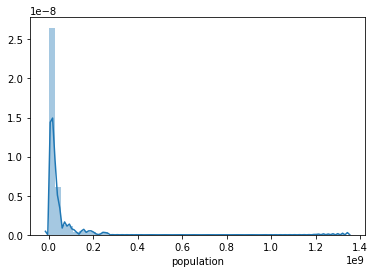

In [129]:
sns.distplot(df5t.population)

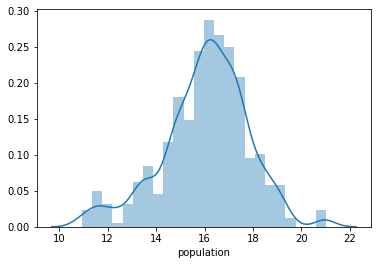

In [126]:
sns.distplot(np.log(df5t.population))

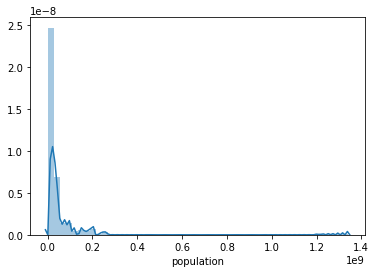

In [130]:
sns.distplot(df5f.population)

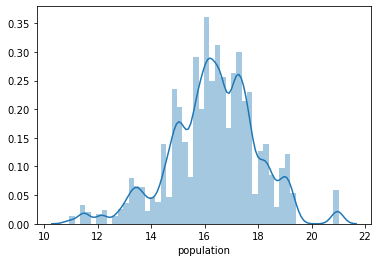

In [127]:
sns.distplot(np.log(df5f.population))

In [143]:
# we fail to reject the null at all conventional levels
ttest_ind(df5t.population, df5f.population, equal_var = False)

Ttest_indResult(statistic=-1.639230912093444, pvalue=0.10144947920689613)

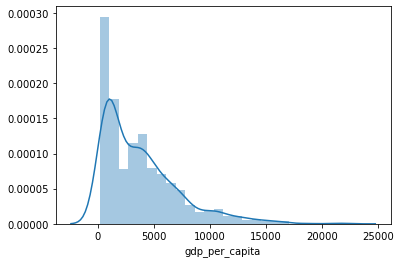

In [128]:
sns.distplot(df5t.gdp_per_capita)

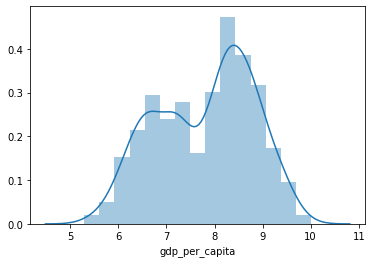

In [131]:
sns.distplot(np.log(df5t.gdp_per_capita))

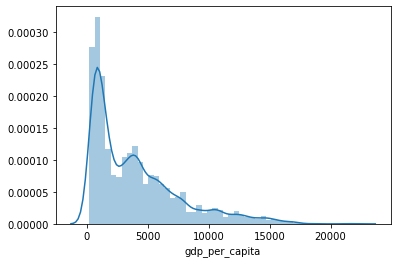

In [132]:
sns.distplot(df5f.gdp_per_capita)

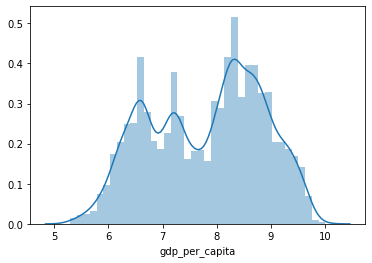

In [133]:
sns.distplot(np.log(df5f.gdp_per_capita))

In [144]:
# we fail to reject the null at all conventional levels
ttest_ind(df5t.gdp_per_capita, df5f.gdp_per_capita, equal_var = False)

Ttest_indResult(statistic=-1.307596670044994, pvalue=0.19128336205607854)

In [135]:
df3t = df_merge[df_merge.us_top_3 == True]
df3f = df_merge[df_merge.us_top_3 == False]

In [140]:
print(len(df3t))
print(len(df3f))

810
21454


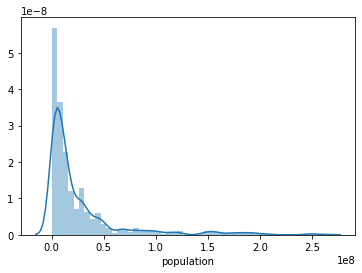

In [137]:
sns.distplot(df3t.population)

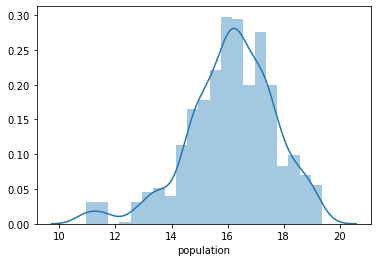

In [141]:
sns.distplot(np.log(df3t.population))

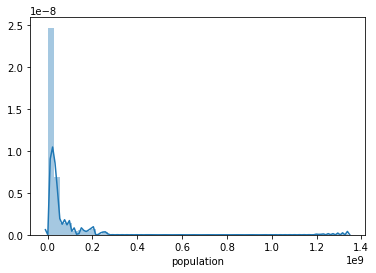

In [138]:
sns.distplot(df3f.population)

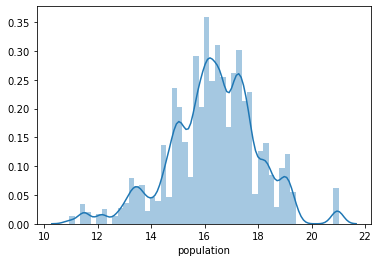

In [142]:
sns.distplot(np.log(df3f.population))

In [134]:
# we reject the null at all conventional levels
ttest_ind(df3t.population, df3f.population, equal_var = False)

Ttest_indResult(statistic=-11.378403487625805, pvalue=5.375173737841991e-29)

In [135]:
# we fail to reject the null at the 5% level and higher
ttest_ind(df3t.gdp_per_capita, df3f.gdp_per_capita, equal_var = False)

Ttest_indResult(statistic=-2.485112071408595, pvalue=0.013135276456865432)

### Logistic Regression  
#### Explanation
Given the nature of the logistic regression, the coefficient estimates can't be interpreted as marginal effects, e.g., how a unit increase in population affects the probability that the U.S. is a top 5 donor, holding all else constant. Their magnitude and sign, i.e., positive or negative, are indicative of the strength and direction of the relationship between the explanatory variables and the respective responses, namely, the top 5 and top 3 indicator variables.

To obtain the marginal effects, there is a table following the model summary with those measures under the dydx column since marginal effects are partial derivatives.

When there are categorical explanatory variables, one of the categories is omitted for both numerical/modeling reasons and to have a reference group. These reference groups are represented by the 'const' estimate. These groups are the year 2008, abr Code 1, expanded code 1, income category H, and the region Africa.

Due to this convention, the way to obtain a general sense of the relationship between the categories and the response is to interpret their estimates as the difference between their relationship and that of the reference group. If the coefficient estimate for a category is negative, relative to the relevant reference group, it will have a lower associated probability of the U.S. being a top 5 donor.

Example: Consider the top 5 indicator model. The estimate for income_category_L is 0.2886. Since it is positive, it has a higher chance of having the U.S. be a top 5 donor relative to income_category_H.


#### Results and Things to Consider
While this may be somewhat informative, permit me to draw your attention to the pseudo-R-squared measures. These represent the explanatory power of our available features. They currently reside at around 1% or lower, meaning, roughly, that 99% of what defines the signal/underlying data-generating process with the U.S. being a top 5 or top 3 donor is not explained by our model.

This is further evidenced by the small magnitudes of the marginal effects. Most are near zero. The largest are in the hundredths.

The z and P>|z| columns are Z-test statistics and associated p-values, respectively. These correspond to individual, two-tailed hypothesis tests where the null is that the true coefficient (that we are trying to estimate) is zero. Notice that in the marginal effect tables, the p-values are either null (probably from some numerical instability) or 1. So in most cases, we fail to reject the null that the true parameter is equal to zero (no relationship with U.S. being a top donor).

Notice that interaction effects and polynomial terms were not included, e.g., population X income_category_L and population X population, respectively. Multiplying all the possible two variable combinations together would generate a staggering number of new features, so they were not included to preserve degrees of freedom.

A possibility is that top 5 and 3 variables have very unusual, non-linear relationships to the explanatory variables, but in the face of almost no signal being picked up, I think this is unlikely. In the event that it is the case, then more ad-hoc machine learning techniques are available, but they lack the same explanatory power. 

An example is that the Random Forest algorithm in the Scikit-Learn package can tell you which features were most important after fitting a model, but not the nature of the relationship.

#### Importing relevant packages  
I have opted to use the statsmodels logistic regression in order to obtain a summary of the model with various diagnostic measures. Scikit-Learn does have an implementation available, but that library in general is more geared toward a purely predictive approach as opposed to an explanatory one.

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm

In [43]:
df_merge.columns

Index(['Donor', 'Recipient', 'Year', 'Value', 'num_donors_by_country_yr',
       'num_donors_by_country', 'ODA_total_value_by_country_yr', 'proportion',
       'Rank', 'us_top_5', 'us_top_3', 'Code_abr', 'Code_expanded',
       'income_category', 'gdp_per_capita', 'population', 'gdp', 'region'],
      dtype='object')

In [44]:
# drop = 'first' omits one category to have a reference group
enc = OneHotEncoder(drop = 'first') 
# fitting the encoder generates binary variables from the categorical variables
# they take on a value of 1 if they are in that category, zero otherwise
X_cat = enc.fit_transform(df_merge[['Year', 'Code_abr', 'Code_expanded', 'income_category', 'region']]).toarray() 

In [45]:
# after generating those columns, I need to give them names
names = enc.get_feature_names(['Year', 'Code_abr', 'Code_expanded', 'income_category', 'region'])
X_cat = pd.DataFrame(X_cat, columns = names)

# I reset the index to not have concatenation problems with the numerical features later
X_cat.reset_index(drop = True, inplace = True)

In [49]:
len(X_cat) # checking the number of rows

22264

In [46]:
# defining the numerical features and resetting their index as well
X_num = df_merge[['population', 'gdp']]
X_num.reset_index(drop = True, inplace = True)

In [51]:
len(X_num)

22264

In [52]:
X_cat.head() # inspecting the features generated from the encoder

,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Code_abr_2,...,Code_expanded_5,Code_expanded_6,income_category_L,income_category_LM,income_category_UM,region_East Asia & Pacific,region_Europe & Eurasia,region_Near East Asia,region_South & Central Asia,region_Western Hemisphere
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_num.head()

,population,gdp
0,60411195.0,1.978852e+10
1,62448574.0,1.864837e+10
2,64563854.0,2.156572e+10
3,66755153.0,2.583975e+10
4,69020747.0,2.930624e+10


In [47]:
# combining the data back together
X = pd.concat([X_num, X_cat], axis = 1)
len(X)

22264

In [55]:
# this adds a column of ones to the dataframe which is needed to have a constant term in the estimation
# X = sm.add_constant(X)

In [56]:
X.head()

,const,population,gdp,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,...,Code_expanded_5,Code_expanded_6,income_category_L,income_category_LM,income_category_UM,region_East Asia & Pacific,region_Europe & Eurasia,region_Near East Asia,region_South & Central Asia,region_Western Hemisphere
0,1.0,60411195.0,1.978852e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,62448574.0,1.864837e+10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,64563854.0,2.156572e+10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,66755153.0,2.583975e+10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,69020747.0,2.930624e+10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# creating the response variables
y1 = [1 if i == True else 0 for i in df_merge.us_top_5]
y2 = [1 if i == True else 0 for i in df_merge.us_top_3]

In [58]:
# making sure the dimensions match
print(len(df_merge))
print(len(X))
print(len(y1))

22264
22264
22264


#### Logistic Regression where the response is the top 5 indicator variable

In [59]:
model1 = sm.Logit(y1, X)

In [64]:
mod1res = model1.fit()
print(mod1res.summary())

Optimization terminated successfully.
         Current function value: 0.181421
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22264
Model:                          Logit   Df Residuals:                    22262
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                0.005578
Time:                        11:19:49   Log-Likelihood:                -4039.2
converged:                       True   LL-Null:                       -4061.8
Covariance Type:            nonrobust   LLR p-value:                 1.680e-11
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.3288      0.129    -25.852      0.000   

In [63]:
mfx1 = mod1res.get_margeff()
print(mfx1.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
population                   4.696e-11        nan        nan        nan         nan         nan
gdp                         -3.293e-14        nan        nan        nan         nan         nan
Year_2009                      -0.0009   2563.760  -3.58e-07      1.000   -5024.878    5024.876
Year_2010                      -0.0024   7000.650  -3.47e-07      1.000   -1.37e+04    1.37e+04
Year_2011                      -0.0040   9112.958  -4.44e-07      1.000   -1.79e+04    1.79e+04
Year_2012                      -0.0024   6430.895  -3.66e-07      1.000   -1.26e+04    1.26e+04
Year_2013                      -0.0043   8930.232  -4.86e-07      1.000   -1.75e

#### Logistic Regression where the response is the top 3 indicator variable

In [65]:
model2 = sm.Logit(y2, X)
mod2res = model2.fit()
print(mod2res.summary())

Optimization terminated successfully.
         Current function value: 0.154598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22264
Model:                          Logit   Df Residuals:                    22262
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.01069
Time:                        11:20:45   Log-Likelihood:                -3442.0
converged:                       True   LL-Null:                       -3479.2
Covariance Type:            nonrobust   LLR p-value:                 6.412e-18
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.9463      0.374    -10.564      0.000   

In [66]:
mfx2 = mod2res.get_margeff()
print(mfx2.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
population                  -1.576e-12   2.99e-11     -0.053      0.958   -6.03e-11    5.71e-11
gdp                         -3.064e-14   9.65e-15     -3.174      0.002   -4.96e-14   -1.17e-14
Year_2009                      -0.0020      0.006     -0.367      0.714      -0.013       0.009
Year_2010                      -0.0021      0.005     -0.391      0.696      -0.013       0.009
Year_2011                      -0.0045      0.006     -0.809      0.418      -0.015       0.006
Year_2012                      -0.0039      0.006     -0.713      0.476      -0.015       0.007
Year_2013                      -0.0060      0.006     -1.082      0.279      -0.

### Random Forest  
For completeness, I ran a random forest ensemble.  While this won't lend itself to explaining the underlying data-generating process, it can possibly point in a direction, but the severe class imbalance of the response variables will greatly restrict the performance of any classifier.

While there are methods of oversampling to correct the imbalance, we cannot totally divorce ourselves from the phenomena that we are working with.  Countries are very unique entities. Artificially generating data for them may get us better performing models for a within-sample case, but in the process, we can exacerbate pre-existing problems such as omitted variable bias, i.e., not having the features we need to better understand any underlying signal (if there is one).

An example of the above would be within country metrics. Not all provinces or states of a country are uniformly developed or have similar economic activity.

For each model, I retrieved the features that yielded the most information for the response variables. More specifically, the top 10 in descending order. For both models, GDP and population were first and third in providing the most information, respectively. While it is not surprising that this is the case, these results can serve as a sanity check for the other features.

In order to return more features, just change the integer in the bracket.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# checking the class balance; by definition, I knew it would be bad
pd.Series(y1).value_counts()

0    21270
1      994
dtype: int64

In [80]:
pd.Series(y2).value_counts()

0    21454
1      810
dtype: int64

#### U.S. top 5 Random Forest

In [66]:
rf = RandomForestClassifier(criterion = 'gini', random_state = 123)
rf_params = {'max_depth': [1, 3, 5, 7, 9, 10],
             'n_estimators': [100, 200, 300],
             'min_samples_leaf': [1, 3, 5, 10]}
rf_search = RandomizedSearchCV(rf, rf_params, random_state = 123, n_iter = 460, scoring = 'accuracy', cv = 5)

In [ ]:
rf_best = rf_search.fit(X, y1)

In [69]:
print('Best params: ', rf_best.best_estimator_.get_params())
print('Best accuracy: ', rf_best.best_score_)

Best params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
Best accuracy:  0.9553539423133379


In [70]:
rf_best = RandomForestClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf = 1, 
                                 min_samples_split = 2, n_estimators = 100, random_state = 123)
rf_mod1 = rf_best.fit(X, y1)

In [71]:
# returning the top 10 most important features for the U.S. top 5
tup = list(zip(X.columns, rf_mod1.feature_importances_))
sorted(tup, key = lambda x: x[1], reverse = True)[:10] # change this number to return more or fewer features

[('gdp', 0.19999999999999996),
 ('region_East Asia & Pacific', 0.13999999999999999),
 ('population', 0.09999999999999998),
 ('Code_expanded_5', 0.06999999999999999),
 ('Year_2009', 0.039999999999999994),
 ('Code_abr_4', 0.039999999999999994),
 ('region_Near East Asia', 0.039999999999999994),
 ('region_South & Central Asia', 0.039999999999999994),
 ('region_Western Hemisphere', 0.039999999999999994),
 ('Code_abr_3', 0.029999999999999992)]

#### U.S. top 3 Random Forest

In [72]:
rf = RandomForestClassifier(criterion = 'gini', random_state = 123)
rf_params = {'max_depth': [1, 3, 5, 7, 9, 10],
             'n_estimators': [100, 200, 300],
             'min_samples_leaf': [1, 3, 5, 10]}
rf_search = RandomizedSearchCV(rf, rf_params, random_state = 123, n_iter = 460, scoring = 'accuracy', cv = 5)

In [ ]:
rf_best = rf_search.fit(X, y2)

In [75]:
print('Best params: ', rf_best.best_estimator_.get_params())
print('Best accuracy: ', rf_best.best_score_)

Best params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
Best accuracy:  0.9636183971192382


In [76]:
rf_best = RandomForestClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf = 1, 
                                 min_samples_split = 2, n_estimators = 100, random_state = 123)
rf_mod2 = rf_best.fit(X, y2)

In [77]:
# returning the top 10 most important features for the U.S. top 3
tup = list(zip(X.columns, rf_mod2.feature_importances_))
sorted(tup, key = lambda x: x[1], reverse = True)[:10]

[('gdp', 0.19999999999999996),
 ('Code_expanded_2', 0.15999999999999998),
 ('population', 0.09999999999999998),
 ('Code_abr_2', 0.08999999999999998),
 ('Code_expanded_5', 0.059999999999999984),
 ('region_Near East Asia', 0.04999999999999999),
 ('region_South & Central Asia', 0.04999999999999999),
 ('Year_2009', 0.039999999999999994),
 ('Code_abr_4', 0.039999999999999994),
 ('region_Western Hemisphere', 0.039999999999999994)]

### Clustering Analysis  
The shorcomings observed with the logistic regression and random forest analyses makes alternative methods a worthwhile excursion.

Since the K-means algorithm is not suited for mixed data types, I have opted to use a clustering algorithm, that is, K-prototypes.

The K-prototypes algorithm yielded lopsided results in terms of the cluster assignments. I specified that the observations be sorted into two clusters, hoping that they would align with one of the top categorical variables. They did not sort out along those dimensions.

The cluster assignment imbalance can be indicative of an underlying pattern (better than a fair coin flip) but again, I caution that not all imbalances should be interpreted as meaningful. Grouping with some of the other categorical variables yielded tables that were too large to be easily interpreted.

While the results were output to a csv, multidimensional depictions in Tableau will probably not reveal any additional information given what has been observed in both the logistic and random forest sections.

#### Considerations  
It is possible that the information contained in these assignments could be latent, meaning that they represent a property that is not currently in our data set but is important, or, more likely, this could be a purely within-sample result. The reason being that the number of clusters must be manually specified, and results can vary depending on how many you tell it to form.

In [211]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [204]:
# clustering best practices requires that the numerical features be standard scaled
# this is so their differing units don't distort results
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_num)
X_scale = pd.DataFrame(X_scale, columns = ['population', 'gdp'])
X_scale.reset_index(drop = True, inplace = True)

In [206]:
X_scale.head()

,population,gdp
0,0.104149,-0.357804
1,0.118398,-0.361049
2,0.133192,-0.352746
3,0.148518,-0.340583
4,0.164363,-0.330718


In [207]:
X_clust = pd.concat([X_scale, X_cat], axis = 1)

In [219]:
# here I define the number of clusters and initialization type
kproto = KPrototypes(n_clusters = 2, init = 'Cao')

# you must tell it which columns are categorical
clusters = kproto.fit_predict(X_clust, categorical = list(range(2, len(X_clust.columns))))

In [220]:
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.cost_)

# while there were few iterations run, the default which was used set a max at 100
print(kproto.n_iter_) 

[array([[-0.11743845, -0.12664374],
       [ 4.93991103,  5.32712067]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0.]])]
60749.53400631396
6


In [226]:
pd.Series(kproto.labels_).value_counts() # lopsidedness of the classes

0    21747
1      517
dtype: int64

In [227]:
len(kproto.labels_)

22264

In [228]:
df_merge['kproto'] = pd.Series(kproto.labels_)

In [229]:
df_merge.head()

,Donor,Recipient,Year,Value,num_donors_by_country_yr,num_donors_by_country,ODA_total_value_by_country_yr,proportion,Rank,us_top_5,us_top_3,Code_abr,Code_expanded,income_category,gdp_per_capita,population,gdp,region,kproto
0,Denmark,Democratic Republic of the Congo,2008,5900000.0,23,28,1.167140e+09,0.005055,16,False,False,2,2,LM,327.563722,60411195.0,1.978852e+10,Africa,0.0
1,Denmark,Democratic Republic of the Congo,2009,5890000.0,24,28,1.456830e+09,0.004043,16,False,False,2,2,LM,298.619682,62448574.0,1.864837e+10,Africa,0.0
2,Denmark,Democratic Republic of the Congo,2010,5890000.0,23,28,2.258180e+09,0.002608,19,False,False,2,2,LM,334.021573,64563854.0,2.156572e+10,Africa,0.0
3,Denmark,Democratic Republic of the Congo,2011,1840000.0,24,28,4.336110e+09,0.000424,19,False,False,2,2,LM,387.082465,66755153.0,2.583975e+10,Africa,0.0
4,Denmark,Democratic Republic of the Congo,2012,230000.0,23,28,1.599800e+09,0.000144,22,False,False,2,2,LM,424.600386,69020747.0,2.930624e+10,Africa,0.0


In [230]:
df_merge.groupby(['us_top_5', 'kproto'])['Recipient'].value_counts()

us_top_5  kproto  Recipient  
False     0.0     Afghanistan    268
                  Kenya          253
                  Egypt          252
                  Lebanon        240
                  Iraq           239
                                ... 
True      0.0     Uruguay          1
          1.0     Uganda          10
                  Gabon            4
                  Djibouti         3
                  Liberia          1
Name: Recipient, Length: 300, dtype: int64

In [231]:
df_merge.groupby(['region', 'kproto'])['Recipient'].value_counts()

region              kproto  Recipient   
Africa              0.0     Kenya           263
                            South Africa    248
                            Ethiopia        247
                            Sudan           246
                            Ghana           242
                                           ... 
Western Hemisphere  1.0     Ecuador           2
                            Argentina         1
                            Cuba              1
                            Guyana            1
                            Paraguay          1
Name: Recipient, Length: 184, dtype: int64

In [232]:
df_merge.groupby(['us_top_3', 'kproto'])['Recipient'].value_counts()

us_top_3  kproto  Recipient  
False     0.0     Afghanistan    268
                  Egypt          256
                  Kenya          253
                  India          248
                  Lebanon        240
                                ... 
True      0.0     Togo             1
                  Tunisia          1
          1.0     Uganda          10
                  Djibouti         1
                  Liberia          1
Name: Recipient, Length: 290, dtype: int64

In [233]:
df_merge.groupby(['Code_abr', 'kproto'])['Recipient'].value_counts()

Code_abr  kproto  Recipient 
1         0.0     Sudan         246
                  Peru          242
                  Brazil        236
                  Mexico        234
                  Tunisia       230
                               ... 
4         1.0     Tajikistan      3
                  Ukraine         3
                  Azerbaijan      2
                  Bangladesh      2
                  Tonga           1
Name: Recipient, Length: 184, dtype: int64

In [234]:
df_merge.groupby(['Code_expanded', 'kproto'])['Recipient'].value_counts()

Code_expanded  kproto  Recipient
1              0.0     Sudan        246
                       Peru         242
                       Brazil       236
                       Mexico       234
                       Tunisia      230
                                   ... 
6              0.0     Lebanon      250
                       Iraq         249
                       Oman          27
               1.0     Lebanon        8
                       Iraq           6
Name: Recipient, Length: 184, dtype: int64

In [235]:
# df_merge.to_csv('kproto.csv')